# XGboost on PumpitUp Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from IPython.display import display, HTML

In [ ]:
#Reading the data
train_set = pd.read_csv('/Users/javiergranda/Google Drive/term2/ml2/pumpitup/data/data_javo/train_set.csv')
test_set = pd.read_csv('/Users/javiergranda/Google Drive/term2/ml2/pumpitup/data/data_javo/test_set.csv')
target = pd.read_csv('/Users/javiergranda/Google Drive/term2/ml2/pumpitup/data/target_vars.csv')
sub_form = pd.read_csv('/Users/javiergranda/Google Drive/term2/ml2/pumpitup/data/SubmissionFormat.csv')

In [ ]:
#Inspect all data
print ("Train data shape:", train_set.shape)
print ("Test data shape:", test_set.shape)
print ("Target features shape:", target.shape)

In [ ]:
# Merging train and target
#train = pd.merge(train_set, target, on='id')
#train.head()

In [ ]:
# Checking var types and nulls
train_set.info()

In [ ]:
# Factorizing target features
train_y = pd.factorize(target['status_group'])[0]
y_index =pd.factorize(target['status_group'])[1]

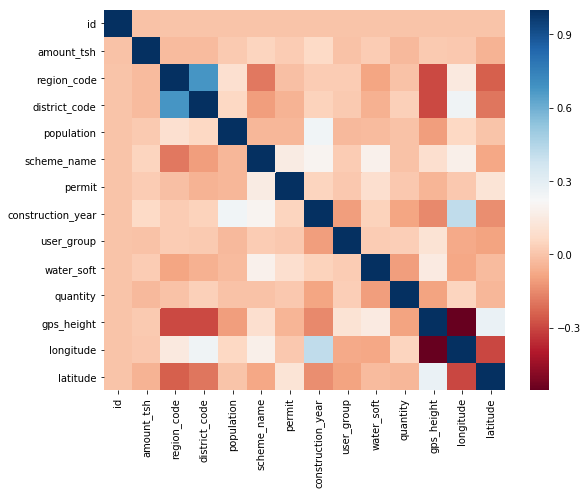

In [48]:
# Checking correlations
corr = train_set.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(corr, cmap="RdBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [ ]:
# Dropping unnecessary columns
X_train = train_set.drop(['id','date_recorded','region'], axis = 1)

# same for test
X_test = test_set.drop(['id','date_recorded','region'], axis = 1)

In [ ]:
# Factorizing character vars on train_set
cat_feat_train = X_train.dtypes.pipe(lambda x: x[x == 'object']).index

# using sklearn function
le = LabelEncoder()
for feature in cat_feat_train:
    X_train[feature] = le.fit_transform(X_train[feature].astype(str))

# filling NAs   
X_train = X_train.fillna(0)

# Same for test set
cat_feat_test = X_test.dtypes.pipe(lambda x: x[x == 'object']).index

le = LabelEncoder()

for feature in cat_feat_test:
    X_test[feature] = le.fit_transform(X_test[feature].astype(str))   

X_test = X_test.fillna(0)

In [ ]:
# Alternative Method: Factorizing character vars on train_set
#cat_feat_train = train_set.dtypes.pipe(lambda x: x[x == 'object']).index

#for c in cat_feat_train:
#    train_set[c] = pd.factorize(train_set[c])[0]

# same for test data   
#cat_feat_test = test_set.dtypes.pipe(lambda x: x[x == 'object']).index

#for c in cat_feat_test:
#    test_set[c] = pd.factorize(test_set[c])[0]

In [ ]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, train_y)

In [ ]:
predictions = gbm.predict(X_test)

In [ ]:
test_set['predict'] = predictions
test_set['predict'] = test_set['predict'].replace(to_replace = [0,1,2], value = y_index)
to_sub = test_set[['id','predict']]

In [ ]:
submission = pd.merge(sub_form, to_sub, on = 'id')
submission = submission.drop('status_group', axis = 1)
submission.columns = ['id', 'status_group']
submission.to_csv('submission.csv',header = True, index = False)